# Random Number Generation

This demonstrates simple random number generation using `numpy`, and shows how to make plots along the way.

For details about the API of modules used here, see the documentation for [numpy](https://numpy.org/) and [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=14)

## Set Random Number Seed

Set the state of numpy's random number generator. Can call this repeatedly to change the seed.

In [2]:
# The same combination as my luggage...
np.random.seed(12345)

## Transforming a Uniform Random Variable

### Draws from a Uniform Distribution

Generate $u\sim U(0,1)$ and histogram the results.

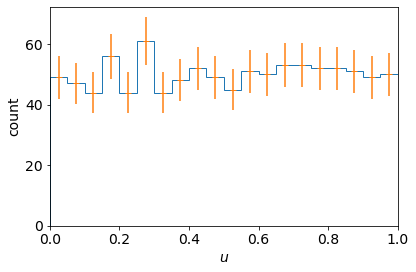

In [3]:
# Generate 1000 random draws from U(0,1).
u = np.random.uniform(0, 1, size=1000)

fig, ax = plt.subplots(1,1, figsize=(6,4), tight_layout=True)

# Histogram the result.
# ubins = bin edges in the histogram: [0, 0.05, 0.1, ..., 1]
ubins = np.linspace(0., 1., 21)
n, bin_edges, p = ax.hist(u, bins=ubins, histtype='step')

# Bin centers: mean of bin edges: [0.025, 0.075, ..., 0.975].
# Bin counts estimate Poisson mean; estimated uncertainties are sqrt(counts).
bin_center = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.errorbar(bin_center, n, yerr=np.sqrt(n), fmt='_')

ax.set(xlim=(0,1), xlabel='$u$', ylabel='count');

### Transform Uniform Numbers into Exponentials

Use the transformation/inversion method to convert $u\sim U(0,1)$ to $x\sim\mathrm{Exp}(-1)$, e.g., sample the distribution

$$
p(x|\beta,I) = \frac{1}{\beta}e^{-x/\beta}~\mathrm{where}~\beta=1.
$$

In practice you could directly generate these quantities by calling `numpy.random.exponential`.

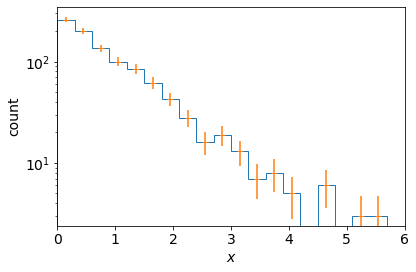

In [4]:
beta = 1.
x = -beta*np.log(u)

fig, ax = plt.subplots(1,1, figsize=(6,4), tight_layout=True)

# Histogram the result.
# Stretch the previous bin edges by 6x.
# Use a log-linear scale.
n, bin_edges, p = ax.hist(x, bins=6*ubins, histtype='step', log=True)

bin_center = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.errorbar(bin_center, n, yerr=np.sqrt(n), fmt='_')

ax.set(xlim=(bin_edges[0], bin_edges[-1]), xlabel='$x$', ylabel='count');

### Generate Two Gaussian Variables using the Box-Müller Algorithm

You could of course use `numpy.random.normal` to generate Gaussian variables but this nicely illustrates the algorithm:

$$
\begin{align}
  u &\sim U(0,1) & v &\sim U(0,1) \\
  x &= \sqrt{-2\ln{u}}\cos{2\pi v}\sim\mathcal{N}(0,1) & y &= \sqrt{-2\ln{u}}\sin{2\pi v}\sim\mathcal{N}(0,1)
\end{align}
$$

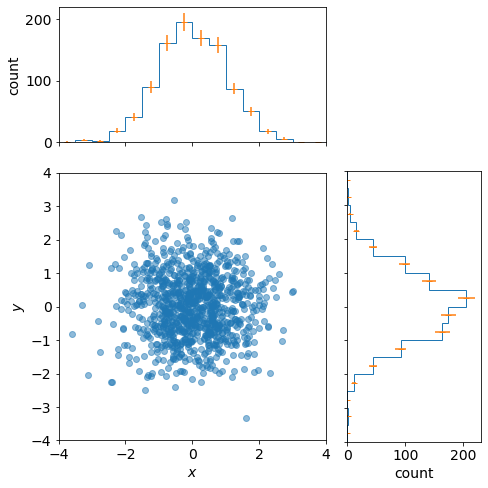

In [5]:
# We already have u, so generate v ~ U(0,1).
v = np.random.uniform(0.,1., size=1000)
r = np.sqrt(-2*np.log(u))
x = r * np.cos(2*np.pi*v)
y = r * np.sin(2*np.pi*v)

# Draw a scatter plot with projected x, y histograms.
# Here I do it manually, but the seaborn package can do this automatically.
fig, axes = plt.subplots(2,2, figsize=(7,7),
                         gridspec_kw={'width_ratios':[2,1], 'height_ratios':[1,2]})

ax = axes[1,0]
ax.scatter(x, y, alpha=0.5)
ax.set(xlim=(-4,4), xlabel='$x$',
       ylim=(-4,4), ylabel='$y$',
       aspect='equal')

# Draw the x projection.
# Binning: [-4, -3.5, -3, ..., 3.5, 4]
hbins = np.linspace(-4,4,17)
ax = axes[0,0]
n, bin_edges, p = ax.hist(x, bins=hbins, histtype='step')
bin_center = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.errorbar(bin_center, n, yerr=np.sqrt(n), fmt='_')
ax.set(xlim=(-4,4), xticklabels=[], ylabel='count')

# Draw the y projection.
ax = axes[1,1]
n, bin_edges, p = ax.hist(y, bins=hbins, histtype='step', orientation='horizontal')
bin_center = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.errorbar(n, bin_center, xerr=np.sqrt(n), fmt='_')
ax.set(ylim=(-4,4), yticklabels=[], xlabel='count')

# Turn the upper right panel off.
ax = axes[0,1]
ax.set_axis_off()

fig.tight_layout();

## Random Numbers via Acceptance-Rejection

Demonstrate sampling from the Rayleigh scattering function
$$
f(x) = \frac{3}{8}(1+x^2)\ \mathrm{where}\ x\in[-1,1]
$$
using the acceptance-rejection technique. In this case the instrumental distribution will be a uniform box between $-1$ and $1$ with maximum value $3/4$.

In [6]:
f = lambda x: 3/8 * (1 + x**2)
x = np.random.uniform(-1,1, size=1000)
y = np.random.uniform(0,0.75, size=1000)

# Boolean array to track accepted and rejected points.
accept = y < f(x)
reject = ~accept

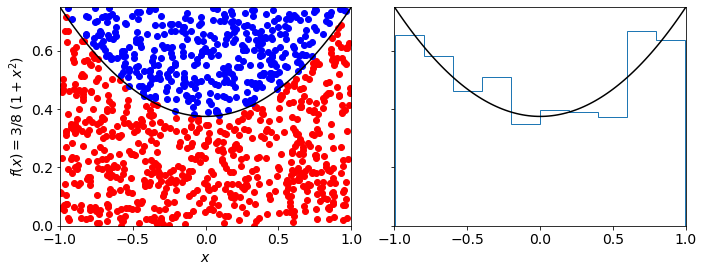

In [7]:
fig, axes = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True, tight_layout=True)

# Draw the accepted points in red and rejected points in blue.
ax = axes[0]
ax.scatter(x[accept], y[accept], color='r')
ax.scatter(x[reject], y[reject], color='b')

# Draw the function.
_x = np.linspace(-1,1,101)
ax.plot(_x, f(_x), color='k')
ax.set(xlabel='$x$', xlim=(-1,1),
       ylabel='$f(x)=3/8~(1+x^2)$', ylim=(0,0.75))

# Histogram the accepted data.
ax = axes[1]
ax.hist(x[accept], density=True, histtype='step')
ax.plot(_x, f(_x), color='k');